# Calculation of back allocation using machine learning

## Importing necessary libraries

In [328]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [270]:
df_well1 = pd.read_excel('datasets\well1.xlsx', sheet_name='Full History', header=2)
df_well2 = pd.read_excel('datasets\well2.xlsx', sheet_name='Full History', header=2)
df_well3 = pd.read_excel('datasets\well3.xlsx', sheet_name='Full History', header=2)
df_well4 = pd.read_excel('datasets\well4.xlsx', sheet_name='Full History', header=2)


In [271]:
df_well1.head()

,Ir. Calender,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1999-01-18 00:00:00,1999-01-19,44.0,76.4,1785.58,123.143448,7409.0,NaN,3.29,0.044386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-02-05 00:00:00,1999-01-20,50.0,NaN,1683.38,116.095172,9205.0,1796.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-02-06 00:00:00,1999-01-21,55.0,NaN,1566.58,108.040000,10454.0,1249.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-08 00:00:00,1999-01-22,55.0,NaN,1576.80,108.744828,10006.0,-448.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-02-09 00:00:00,1999-01-25,55.0,NaN,1575.34,108.644138,9877.0,-129.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
#selecting columns with proper names only
df_well1 = df_well1[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well2 = df_well2[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well3 = df_well3[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well4 = df_well4[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well1.head()

,Ir. Calender,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR,API
0,1999-01-18 00:00:00,1999-01-19,44.0,76.4,1785.58,123.143448,7409.0,NaN,3.29,0.044386,6936.0,936.158726,NaN
1,1999-02-05 00:00:00,1999-01-20,50.0,NaN,1683.38,116.095172,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871,NaN
2,1999-02-06 00:00:00,1999-01-21,55.0,NaN,1566.58,108.040000,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265,NaN
3,1999-02-08 00:00:00,1999-01-22,55.0,NaN,1576.80,108.744828,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470,NaN
4,1999-02-09 00:00:00,1999-01-25,55.0,NaN,1575.34,108.644138,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604,NaN


## Data cleaning and EDA

### Well 1

In [273]:
df_well1.shape

(191, 13)

In [274]:
df_well1.isnull().sum()

Ir. Calender           0
Eng. Calender         13
Choke(/64")           96
WHT (0C)              22
WHP (psig)             0
WHP (barg)             0
Oil Rate (STBD)        0
∆Q (STBD)              1
Water Rate(sbwpd)      5
BS&W                   0
Gas Rate (mscfd)       6
GOR                    1
API                  176
dtype: int64

In [275]:
## since choke and API has null values more than 50% of data we can drop these columns
df_well1 = df_well1.drop(['Choke(/64")','API' ], axis=1)

In [276]:
df_well1

,Ir. Calender,Eng. Calender,WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-18 00:00:00,1999-01-19,76.4,1785.58,123.143448,7409.0,NaN,3.29,0.044386,6936.0,936.158726
1,1999-02-05 00:00:00,1999-01-20,NaN,1683.38,116.095172,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871
2,1999-02-06 00:00:00,1999-01-21,NaN,1566.58,108.040000,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265
3,1999-02-08 00:00:00,1999-01-22,NaN,1576.80,108.744828,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470
4,1999-02-09 00:00:00,1999-01-25,NaN,1575.34,108.644138,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604
...,...,...,...,...,...,...,...,...,...,...,...
186,1388/08/24,NaT,87.3,1858.90,128.200000,4793.0,313.0,0.00,0.000000,5925.0,1236.177759
187,1388/09/25,NaT,87.0,1812.50,125.000000,4825.0,32.0,0.00,0.000000,6013.0,1246.217617
188,1388/11/15,NaT,86.0,1777.70,122.600000,4580.0,-245.0,5.00,0.100000,5716.0,1248.034934
189,1388/12/29,NaT,87.0,1767.55,121.900000,4825.0,245.0,5.00,0.100000,6205.0,1286.010363


In [277]:
#drop unnecessary colunms
df_well1 = df_well1.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [278]:
df_well1.head()

,Eng. Calender,WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,76.4,1785.58,7409.0,NaN,3.29,0.044386,6936.0,936.158726
1,1999-01-20,NaN,1683.38,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871
2,1999-01-21,NaN,1566.58,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265
3,1999-01-22,NaN,1576.80,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470
4,1999-01-25,NaN,1575.34,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604


In [279]:
#select the data until Eng. Calendar is not null
df_well1 = df_well1[df_well1['Eng. Calender'].notnull()]
df_well1

,Eng. Calender,WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,76.4,1785.58,7409.0,NaN,3.29,0.044386,6936.0,936.158726
1,1999-01-20,NaN,1683.38,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871
2,1999-01-21,NaN,1566.58,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265
3,1999-01-22,NaN,1576.80,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470
4,1999-01-25,NaN,1575.34,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604
...,...,...,...,...,...,...,...,...,...
173,2005-12-09,85.0,1941.55,4086.0,-2.0,2.00,0.050000,5583.0,1366.372981
174,2006-01-09,85.0,1953.15,4107.0,21.0,NaN,0.100000,NaN,1178.600000
175,2006-02-06,85.0,1902.40,4203.0,96.0,NaN,0.100000,NaN,1120.000000
176,2006-03-07,85.0,1918.35,4155.0,-48.0,NaN,0.100000,NaN,1317.000000


In [280]:
df_well1.isnull().sum()

Eng. Calender         0
WHT (0C)             22
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             1
Water Rate(sbwpd)     4
BS&W                  0
Gas Rate (mscfd)      5
GOR                   1
dtype: int64

<Axes: xlabel='GOR', ylabel='Count'>

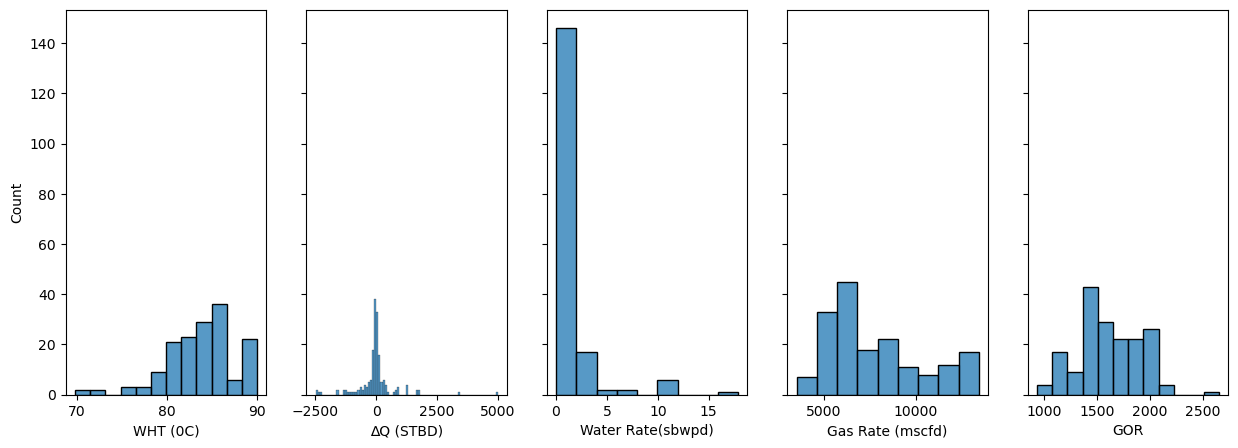

In [281]:
# Distribution of WHT, delta Q, Water Rate,  Gas Rate and GOR  in subplots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
sns.histplot(df_well1['WHT (0C)'], ax=axes[0])
sns.histplot(df_well1['∆Q (STBD)'], ax=axes[1])
sns.histplot(df_well1['Water Rate(sbwpd)'], ax=axes[2])
sns.histplot(df_well1['Gas Rate (mscfd)'], ax=axes[3])
sns.histplot(df_well1['GOR'], ax=axes[4])



In [282]:
# fill up the null values with mean for WHT, delta Q, Gas rate, GOR and median for Water Rate
df_well1['WHT (0C)'] = df_well1['WHT (0C)'].fillna(df_well1['WHT (0C)'].mean())
df_well1['∆Q (STBD)'] = df_well1['∆Q (STBD)'].fillna(df_well1['∆Q (STBD)'].mean())
df_well1['Water Rate(sbwpd)'] = df_well1['Water Rate(sbwpd)'].fillna(df_well1['Water Rate(sbwpd)'].median())
df_well1['Gas Rate (mscfd)'] = df_well1['Gas Rate (mscfd)'].fillna(df_well1['Gas Rate (mscfd)'].mean())
df_well1['GOR'] = df_well1['GOR'].fillna(df_well1['GOR'].mean())

In [283]:
df_well1.isnull().sum()


Eng. Calender        0
WHT (0C)             0
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            0
Water Rate(sbwpd)    0
BS&W                 0
Gas Rate (mscfd)     0
GOR                  0
dtype: int64

In [284]:
#rename all the columns to add _ in between the names and exclude the units
df_well1 = df_well1.rename(columns={'Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
# add 'well_1' at the end of each column name except Eng_Calender
df_well1 = df_well1.add_suffix('_well_1')
df_well1 = df_well1.rename(columns={'Eng_Calender_well_1':'Eng_Calender'})
df_well1.head()

,Eng_Calender,WHT_well_1,WHP_well_1,Oil_Rate_well_1,delta_Q_well_1,Water_Rate_well_1,BS&W_well_1,Gas_Rate_well_1,GOR_well_1
0,1999-01-19,76.400000,1785.58,7409.0,-15.875706,3.29,0.044386,6936.0,936.158726
1,1999-01-20,83.657051,1683.38,9205.0,1796.000000,0.00,0.000000,9420.0,1023.356871
2,1999-01-21,83.657051,1566.58,10454.0,1249.000000,0.00,0.000000,10812.0,1034.245265
3,1999-01-22,83.657051,1576.80,10006.0,-448.000000,0.00,0.000000,10832.0,1082.550470
4,1999-01-25,83.657051,1575.34,9877.0,-129.000000,0.00,0.000000,10976.0,1111.268604


### Well 2

In [285]:
df_well2.shape

(233, 13)

In [286]:
df_well2.isnull().sum()

Ir. Calender          44
Eng. Calender         27
Choke(/64")          107
WHT (0C)              19
WHP (psig)             0
WHP (barg)            11
Oil Rate (STBD)       11
∆Q (STBD)             12
Water Rate(sbwpd)     16
BS&W                  11
Gas Rate (mscfd)      17
GOR                   12
API                  219
dtype: int64

In [287]:
## since choke and API has null values more than 50% of data we can drop these columns
df_well2 = df_well2.drop(['Choke(/64")','API' ], axis=1)

In [288]:
df_well2.head()

,Ir. Calender,Eng. Calender,WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1377/10/29,1999-01-19,79.0,1378.95,95.1,11092.0,NaN,31.95,0.0,8730.6,787.107825
1,1377/10/30,1999-01-20,80.0,1326.75,91.5,11784.0,692.0,0.00,0.0,10063.2,853.971487
2,1377/11/1,1999-01-21,80.0,1338.35,92.3,11637.0,-147.0,0.00,0.0,9968.0,856.578156
3,1377/11/2,1999-01-22,80.0,1363.00,94.0,11305.0,-332.0,0.00,0.0,9763.2,863.617868
4,1377/11/5,1999-01-25,80.0,1138.25,78.5,13307.0,2002.0,0.00,0.0,11945.6,897.692944


In [289]:
#drop unnecessary colunms
df_well2 = df_well2.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [290]:
#select the data until Eng. Calendar is not null
df_well2 = df_well2[df_well2['Eng. Calender'].notnull()]
df_well2

,Eng. Calender,WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,79.0,1378.95,11092.0,NaN,31.95,0.00,8730.6,787.107825
1,1999-01-20,80.0,1326.75,11784.0,692.0,0.00,0.00,10063.2,853.971487
2,1999-01-21,80.0,1338.35,11637.0,-147.0,0.00,0.00,9968.0,856.578156
3,1999-01-22,80.0,1363.00,11305.0,-332.0,0.00,0.00,9763.2,863.617868
4,1999-01-25,80.0,1138.25,13307.0,2002.0,0.00,0.00,11945.6,897.692944
...,...,...,...,...,...,...,...,...,...
201,2008-04-01,84.4,1758.85,3966.0,6.0,24.00,0.60,4975.0,1254.412506
202,2008-06-01,84.9,1744.35,3950.0,-16.0,12.00,0.30,5064.0,1282.025316
203,2008-08-02,85.3,1726.95,3984.0,34.0,6.00,0.15,4275.0,1073.042169
204,2008-09-03,85.3,1718.25,3954.0,-30.0,24.00,0.60,4290.0,1084.977238


In [291]:
df_well2.isnull().sum()

Eng. Calender        0
WHT (0C)             8
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            1
Water Rate(sbwpd)    0
BS&W                 0
Gas Rate (mscfd)     1
GOR                  1
dtype: int64

<Axes: xlabel='Gas Rate (mscfd)', ylabel='Count'>

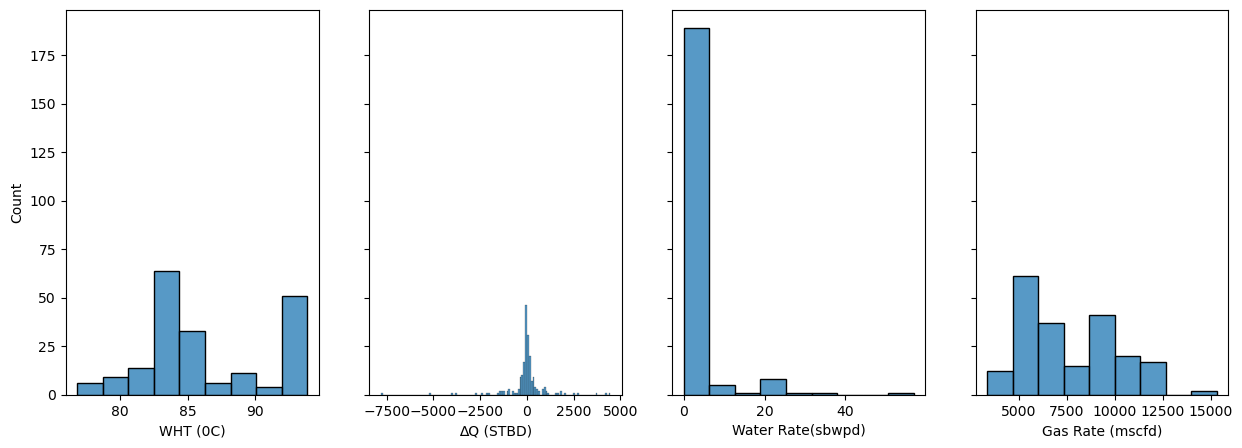

In [292]:
# Distribution of WHT, delta Q, Water Rate,  Gas Rate  in subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.histplot(df_well2['WHT (0C)'], ax=axes[0])
sns.histplot(df_well2['∆Q (STBD)'], ax=axes[1])
sns.histplot(df_well2['Water Rate(sbwpd)'], ax=axes[2])
sns.histplot(df_well2['Gas Rate (mscfd)'], ax=axes[3])

In [293]:
# fill up the null values with mean for delta Q, Gas rate and median for Water Rate, WHT
df_well2['∆Q (STBD)'] = df_well2['∆Q (STBD)'].fillna(df_well2['∆Q (STBD)'].mean())
df_well2['Gas Rate (mscfd)'] = df_well2['Gas Rate (mscfd)'].fillna(df_well2['Gas Rate (mscfd)'].mean())
df_well2['WHT (0C)'] = df_well2['WHT (0C)'].fillna(df_well2['WHT (0C)'].median())
df_well2['Water Rate(sbwpd)'] = df_well2['Water Rate(sbwpd)'].fillna(df_well2['Water Rate(sbwpd)'].median())
df_well2['GOR'] = df_well2['GOR'].fillna(df_well2['GOR'].mean())


In [294]:
df_well2.isnull().sum()

Eng. Calender        0
WHT (0C)             0
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            0
Water Rate(sbwpd)    0
BS&W                 0
Gas Rate (mscfd)     0
GOR                  0
dtype: int64

In [295]:
#rename all the columns to add _ in between the names and exclude the units
df_well2 = df_well2.rename(columns={'Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
# add 'well_1' at the end of each column name except Eng_Calender
df_well2 = df_well2.add_suffix('_well_2')
df_well2 = df_well2.rename(columns={'Eng_Calender_well_2':'Eng_Calender'})
df_well2.head()

,Eng_Calender,WHT_well_2,WHP_well_2,Oil_Rate_well_2,delta_Q_well_2,Water_Rate_well_2,BS&W_well_2,Gas_Rate_well_2,GOR_well_2
0,1999-01-19,79.0,1378.95,11092.0,-34.804878,31.95,0.0,8730.6,787.107825
1,1999-01-20,80.0,1326.75,11784.0,692.000000,0.00,0.0,10063.2,853.971487
2,1999-01-21,80.0,1338.35,11637.0,-147.000000,0.00,0.0,9968.0,856.578156
3,1999-01-22,80.0,1363.00,11305.0,-332.000000,0.00,0.0,9763.2,863.617868
4,1999-01-25,80.0,1138.25,13307.0,2002.000000,0.00,0.0,11945.6,897.692944


### Well 3

In [296]:
df_well3.shape

(217, 13)

In [297]:
df_well3.isnull().sum()

Ir. Calender          47
Eng. Calender         39
Choke(/64")          109
WHT (0C)              28
WHP (psig)             0
WHP (barg)            18
Oil Rate (STBD)       18
∆Q (STBD)              1
Water Rate(sbwpd)     27
BS&W                  22
Gas Rate (mscfd)      23
GOR                   18
API                  217
dtype: int64

In [298]:
## since choke and API has null values more than 50% of data we can drop these columns
df_well3 = df_well3.drop(['Choke(/64")','API' ], axis=1)

In [299]:
#drop unnecessary colunms
df_well3 = df_well3.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [300]:
#select the data until Eng. Calendar is not null
df_well3 = df_well3[df_well3['Eng. Calender'].notnull()]
df_well3

,Eng. Calender,WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,74.6,1541.35,7888.0,NaN,8.96,0.113967,5892.0,746.957404
1,1999-01-20,80.0,1442.75,8933.0,1045.0,0.00,0.000000,7174.2,803.112056
2,1999-01-21,80.0,1339.80,9558.0,625.0,0.00,0.000000,7778.4,813.810421
3,1999-01-22,80.0,1370.25,8896.0,-662.0,0.00,0.000000,7457.6,838.309353
4,1999-01-25,80.0,1377.50,8725.0,-171.0,0.00,0.000000,7348.8,842.269341
...,...,...,...,...,...,...,...,...,...
173,2005-12-09,84.3,1173.05,3095.0,4.0,422.00,12.000000,3757.0,1213.893376
174,2006-01-09,84.4,1168.70,3142.0,47.0,388.00,11.000000,3970.0,1178.600000
175,2006-02-06,84.2,1171.60,3156.0,14.0,390.00,11.000000,3896.5,1120.000000
176,2006-03-07,NaN,1170.15,3108.0,-48.0,464.50,13.000000,3676.0,1317.000000


In [301]:
df_well3.isnull().sum()

Eng. Calender        0
WHT (0C)             9
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            1
Water Rate(sbwpd)    4
BS&W                 4
Gas Rate (mscfd)     0
GOR                  0
dtype: int64

<Axes: xlabel='BS&W', ylabel='Count'>

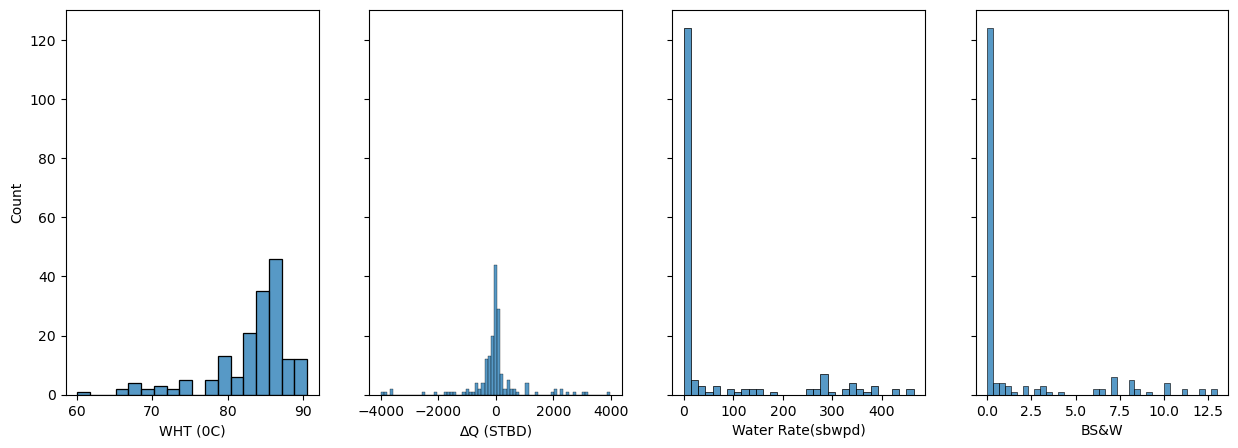

In [302]:
# Distribution of WHT, delta Q, Water Rate,  BS&W  in subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.histplot(df_well3['WHT (0C)'], ax=axes[0])
sns.histplot(df_well3['∆Q (STBD)'], ax=axes[1])
sns.histplot(df_well3['Water Rate(sbwpd)'], ax=axes[2])
sns.histplot(df_well3['BS&W'], ax=axes[3])

In [303]:
# fill up the null values with mean for WHT, delta Q  and median for Water Rate, BS&W
df_well3['∆Q (STBD)'] = df_well3['∆Q (STBD)'].fillna(df_well3['∆Q (STBD)'].mean())
df_well3['WHT (0C)'] = df_well3['WHT (0C)'].fillna(df_well3['WHT (0C)'].mean())
df_well3['Water Rate(sbwpd)'] = df_well3['Water Rate(sbwpd)'].fillna(df_well3['Water Rate(sbwpd)'].median())
df_well3['BS&W'] = df_well3['BS&W'].fillna(df_well3['BS&W'].median())

In [304]:
df_well3.isnull().sum()

Eng. Calender        0
WHT (0C)             0
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            0
Water Rate(sbwpd)    0
BS&W                 0
Gas Rate (mscfd)     0
GOR                  0
dtype: int64

In [305]:
#rename all the columns to add _ in between the names and exclude the units
df_well3 = df_well3.rename(columns={'Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
# add 'well_1' at the end of each column name except Eng_Calender
df_well3 = df_well3.add_suffix('_well_3')
df_well3 = df_well3.rename(columns={'Eng_Calender_well_3':'Eng_Calender'})
df_well3.head()

,Eng_Calender,WHT_well_3,WHP_well_3,Oil_Rate_well_3,delta_Q_well_3,Water_Rate_well_3,BS&W_well_3,Gas_Rate_well_3,GOR_well_3
0,1999-01-19,74.6,1541.35,7888.0,-27.112994,8.96,0.113967,5892.0,746.957404
1,1999-01-20,80.0,1442.75,8933.0,1045.000000,0.00,0.000000,7174.2,803.112056
2,1999-01-21,80.0,1339.80,9558.0,625.000000,0.00,0.000000,7778.4,813.810421
3,1999-01-22,80.0,1370.25,8896.0,-662.000000,0.00,0.000000,7457.6,838.309353
4,1999-01-25,80.0,1377.50,8725.0,-171.000000,0.00,0.000000,7348.8,842.269341


### Well 4

In [306]:
df_well4.shape

(187, 13)

In [307]:
df_well4.isnull().sum()

Ir. Calender          42
Eng. Calender          9
Choke(/64")           99
WHT (0C)              37
WHP (psig)             0
WHP (barg)            10
Oil Rate (STBD)        9
∆Q (STBD)              1
Water Rate(sbwpd)     13
BS&W                   9
Gas Rate (mscfd)      13
GOR                    9
API                  187
dtype: int64

In [308]:
## since choke and API has null values more than 50% of data we can drop these columns
df_well4 = df_well4.drop(['Choke(/64")','API' ], axis=1)

In [309]:
#drop unnecessary colunms
df_well4 = df_well4.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [310]:
#select the data until Eng. Calendar is not null
df_well4 = df_well4[df_well4['Eng. Calender'].notnull()]
df_well4

,Eng. Calender,WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,NaN,1286.15,10874.0,NaN,0.0,0.0,9600.0,882.839801
1,1999-01-20,80.0,1316.60,10280.0,-594.0,0.0,0.0,9200.0,894.941634
2,1999-01-21,80.0,1307.90,10243.0,-37.0,0.0,0.0,9200.0,898.174363
3,1999-01-22,80.0,1296.30,10209.0,-34.0,0.0,0.0,9120.0,893.329415
4,1999-01-25,NaN,1595.00,9524.0,-685.0,0.0,0.0,8119.2,852.498950
...,...,...,...,...,...,...,...,...,...
173,2005-12-09,84.0,1521.05,2974.0,24.0,609.0,17.0,6672.0,2243.443174
174,2006-01-09,84.0,1506.55,3131.0,157.0,641.0,17.0,7362.0,2351.325455
175,2006-02-06,85.0,1476.10,2934.0,-197.0,733.0,20.0,7293.0,2485.685072
176,2006-03-07,84.0,1458.70,3083.0,149.0,819.0,21.0,7081.0,2296.788842


In [311]:
df_well4.isnull().sum()

Eng. Calender         0
WHT (0C)             28
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             1
Water Rate(sbwpd)     4
BS&W                  0
Gas Rate (mscfd)      4
GOR                   0
dtype: int64

<Axes: xlabel='Gas Rate (mscfd)', ylabel='Count'>

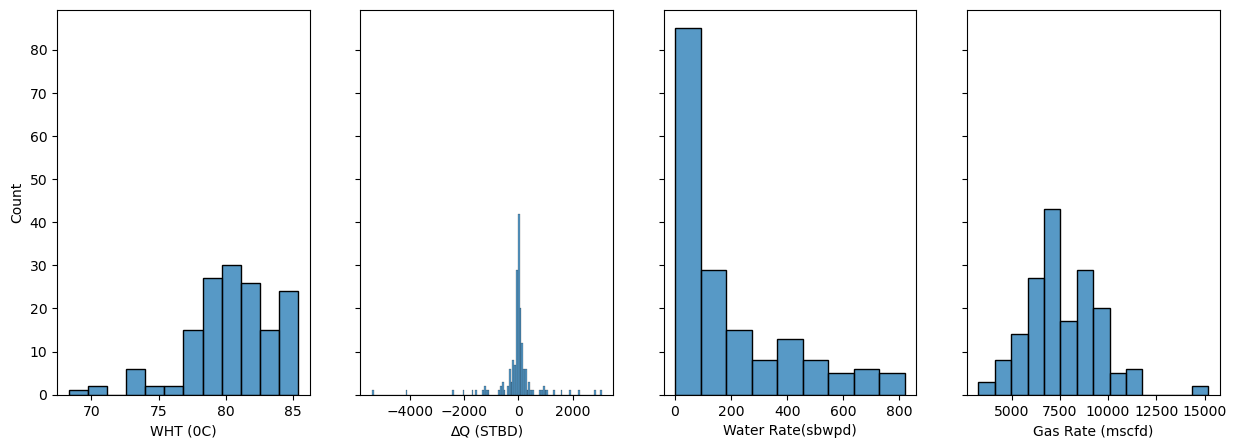

In [312]:
# Distribution of WHT, delta Q, Water Rate,  BS&W  in subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.histplot(df_well4['WHT (0C)'], ax=axes[0])
sns.histplot(df_well4['∆Q (STBD)'], ax=axes[1])
sns.histplot(df_well4['Water Rate(sbwpd)'], ax=axes[2])
sns.histplot(df_well4['Gas Rate (mscfd)'], ax=axes[3])

In [313]:
# fill up the null values with mean for WHT, delta Q  and median for Water Rate, Gas Rate (mscfd)
df_well4['∆Q (STBD)'] = df_well4['∆Q (STBD)'].fillna(df_well4['∆Q (STBD)'].mean())
df_well4['WHT (0C)'] = df_well4['WHT (0C)'].fillna(df_well4['WHT (0C)'].mean())
df_well4['Water Rate(sbwpd)'] = df_well4['Water Rate(sbwpd)'].fillna(df_well4['Water Rate(sbwpd)'].median())
df_well4['Gas Rate (mscfd)'] = df_well4['Gas Rate (mscfd)'].fillna(df_well4['Gas Rate (mscfd)'].median())

In [314]:
df_well4.isnull().sum()

Eng. Calender        0
WHT (0C)             0
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            0
Water Rate(sbwpd)    0
BS&W                 0
Gas Rate (mscfd)     0
GOR                  0
dtype: int64

In [315]:
#rename all the columns to add _ in between the names and exclude the units
df_well4 = df_well4.rename(columns={'Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
# add 'well_1' at the end of each column name except Eng_Calender
df_well4 = df_well4.add_suffix('_well_4')
df_well4 = df_well4.rename(columns={'Eng_Calender_well_4':'Eng_Calender'})
df_well4.head()

,Eng_Calender,WHT_well_4,WHP_well_4,Oil_Rate_well_4,delta_Q_well_4,Water_Rate_well_4,BS&W_well_4,Gas_Rate_well_4,GOR_well_4
0,1999-01-19,80.450667,1286.15,10874.0,-43.344633,0.0,0.0,9600.0,882.839801
1,1999-01-20,80.000000,1316.60,10280.0,-594.000000,0.0,0.0,9200.0,894.941634
2,1999-01-21,80.000000,1307.90,10243.0,-37.000000,0.0,0.0,9200.0,898.174363
3,1999-01-22,80.000000,1296.30,10209.0,-34.000000,0.0,0.0,9120.0,893.329415
4,1999-01-25,80.450667,1595.00,9524.0,-685.000000,0.0,0.0,8119.2,852.498950


In [316]:
#merge df_well1, df_well2, df_well3, df_well4 based on Eng_Calender column to create a single dataframe
df = pd.merge(df_well1, df_well2, on='Eng_Calender')
df = pd.merge(df, df_well3, on='Eng_Calender')
df = pd.merge(df, df_well4, on='Eng_Calender')
df.head()

,Eng_Calender,WHT_well_1,WHP_well_1,Oil_Rate_well_1,delta_Q_well_1,Water_Rate_well_1,BS&W_well_1,Gas_Rate_well_1,GOR_well_1,WHT_well_2,...,Gas_Rate_well_3,GOR_well_3,WHT_well_4,WHP_well_4,Oil_Rate_well_4,delta_Q_well_4,Water_Rate_well_4,BS&W_well_4,Gas_Rate_well_4,GOR_well_4
0,1999-01-19,76.400000,1785.58,7409.0,-15.875706,3.29,0.044386,6936.0,936.158726,79.0,...,5892.0,746.957404,80.450667,1286.15,10874.0,-43.344633,0.0,0.0,9600.0,882.839801
1,1999-01-20,83.657051,1683.38,9205.0,1796.000000,0.00,0.000000,9420.0,1023.356871,80.0,...,7174.2,803.112056,80.000000,1316.60,10280.0,-594.000000,0.0,0.0,9200.0,894.941634
2,1999-01-21,83.657051,1566.58,10454.0,1249.000000,0.00,0.000000,10812.0,1034.245265,80.0,...,7778.4,813.810421,80.000000,1307.90,10243.0,-37.000000,0.0,0.0,9200.0,898.174363
3,1999-01-22,83.657051,1576.80,10006.0,-448.000000,0.00,0.000000,10832.0,1082.550470,80.0,...,7457.6,838.309353,80.000000,1296.30,10209.0,-34.000000,0.0,0.0,9120.0,893.329415
4,1999-01-25,83.657051,1575.34,9877.0,-129.000000,0.00,0.000000,10976.0,1111.268604,80.0,...,7348.8,842.269341,80.450667,1595.00,9524.0,-685.000000,0.0,0.0,8119.2,852.498950


In [322]:
#create a new column named 'total_oil_rate' which is the sum of oil rate of all the wells
df['total_oil_rate'] = df['Oil_Rate_well_1'] + df['Oil_Rate_well_2'] + df['Oil_Rate_well_3'] + df['Oil_Rate_well_4']

### Model building 

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Eng_Calender       178 non-null    datetime64[ns]
 1   WHT_well_1         178 non-null    float64       
 2   WHP_well_1         178 non-null    float64       
 3   Oil_Rate_well_1    178 non-null    float64       
 4   delta_Q_well_1     178 non-null    float64       
 5   Water_Rate_well_1  178 non-null    float64       
 6   BS&W_well_1        178 non-null    float64       
 7   Gas_Rate_well_1    178 non-null    float64       
 8   GOR_well_1         178 non-null    float64       
 9   WHT_well_2         178 non-null    float64       
 10  WHP_well_2         178 non-null    float64       
 11  Oil_Rate_well_2    178 non-null    float64       
 12  delta_Q_well_2     178 non-null    float64       
 13  Water_Rate_well_2  178 non-null    float64       
 14  BS&W_well_

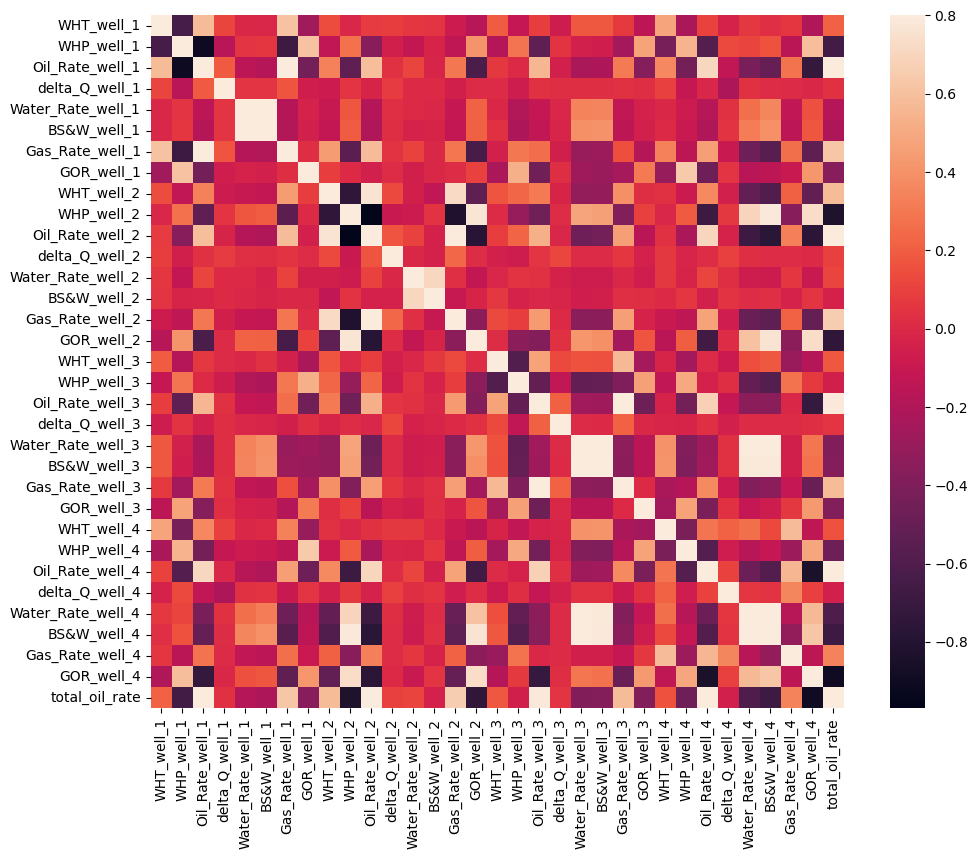

In [324]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [333]:
#create x and y variables in which x has WHP for all wells and y has Oil_Rate for all wells
x = df[['WHP_well_1', 'WHP_well_2', 'WHP_well_3', 'WHP_well_4', 'total_oil_rate']]
y = df[['Oil_Rate_well_1', 'Oil_Rate_well_2', 'Oil_Rate_well_3', 'Oil_Rate_well_4']]

In [334]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [335]:
#model training
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [336]:
#evaluate the model
y_pred = lm.predict(x_test)
y_pred

array([[ 7446.63547265,  9701.32601372,  6023.00251064,  5241.886003  ],
       [ 8532.87072624,  6931.17070481,  6221.35112023,  6513.27744872],
       [ 3892.75867021,  3527.19919554,  4760.060077  ,  2785.78205724],
       [ 7100.84060741, 10128.91446074,  4895.15678119,  4875.80815066],
       [ 3777.15892911,  3343.44462866,  4164.37223137,  2773.02421086],
       [ 3679.15080917,  6856.50360662,  2274.87233873,  3888.87324548],
       [ 4182.38045312,  3262.81950275,  3368.38791308,  2748.01213105],
       [ 4904.08850621, 11071.96128782, 10397.28335425,  8845.54685172],
       [ 2931.56522053,  4177.37283113,  5520.48414004,  2459.87780831],
       [ 2790.79701208,  4205.42430973,  1791.17866071,  1303.90001748],
       [ 8440.65168436,  6032.41454458,  3495.06051277,  6079.84325829],
       [ 2778.80436713, 11598.52108142,  4525.317683  ,  4901.35686846],
       [ 7115.41569588, 10158.84628164,  4818.04820492,  4779.50981756],
       [ 7147.54562299, 10369.60812195,  6104.42085

In [338]:
#evaluation for all wells 
r2_well1 = r2_score(y_test['Oil_Rate_well_1'], y_pred[:, 0])
r2_well2 = r2_score(y_test['Oil_Rate_well_2'], y_pred[:, 1])
r2_well3 = r2_score(y_test['Oil_Rate_well_3'], y_pred[:, 2])
r2_well4 = r2_score(y_test['Oil_Rate_well_4'], y_pred[:, 3])

print(f"R2 Score for Well 1 Oil rate: {r2_well1}")
print(f"R2 Score for Well 2 Oil rate: {r2_well2}")
print(f"R2 Score for Well 3 Oil rate: {r2_well3}")
print(f"R2 Score for Well 4 Oil rate: {r2_well4}")

R2 Score for Well 1 Oil rate: 0.9531522837863602
R2 Score for Well 2 Oil rate: 0.9487363040045147
R2 Score for Well 3 Oil rate: 0.8511626232312575
R2 Score for Well 4 Oil rate: 0.5453176293472054
Mean Squared Error for Well 1 Oil rate: 180373.5105931912
Mean Squared Error for Well 2 Oil rate: 632415.4112992699
Mean Squared Error for Well 3 Oil rate: 637205.0232991503
Mean Squared Error for Well 4 Oil rate: 1778623.8348637137
